In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# ASIGNAMOS EL DATASET A NUESTRA VARIABLE E IMPRIMIMOS LOS PRIMEROS DATOS
datos = pd.read_csv(filepath_or_buffer = "/Cursos/Python/Evaluacion2/samsung.csv")
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [3]:
# CONVERTIMOS COLUMNA Date A DATETIME Y CREAMOS UNA NUEVA LLAMADA Year
datos['Date'] = pd.to_datetime(datos['Date'], format='%d/%m/%Y')
datos['Year'] = datos['Date'].dt.year

In [4]:
# SE MUESTRAN MÉTRICAS DE LOS DATOS
datos.describe()

,Date,Close,Volume,Year
count,2850,2850.000000,2.850000e+03,2850.000000
mean,2013-09-12 15:43:49.894736640,26611.305263,1.610505e+07,2013.209474
min,2008-01-02 00:00:00,8040.000000,0.000000e+00,2008.000000
25%,2010-10-25 06:00:00,16300.000000,1.021426e+07,2010.000000
50%,2013-09-02 12:00:00,25600.000000,1.359033e+07,2013.000000
75%,2016-07-26 18:00:00,30850.000000,1.960970e+07,2016.000000
max,2019-06-28 00:00:00,57220.000000,6.487345e+07,2019.000000
std,NaN,11991.608543,8.661794e+06,3.331142


In [5]:
# AGRUPAMOS LOS DATOS POR SU COLUMNA Year Y LOS MOSTRAMOS
print(datos.groupby('Year').size())

Year
2008    257
2009    253
2010    251
2011    248
2012    248
2013    247
2014    245
2015    249
2016    246
2017    241
2018    244
2019    121
dtype: int64


In [6]:
# AJUSTAMOS TAMAÑO Y ESTILO PARA LAS GRÁFICAS
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

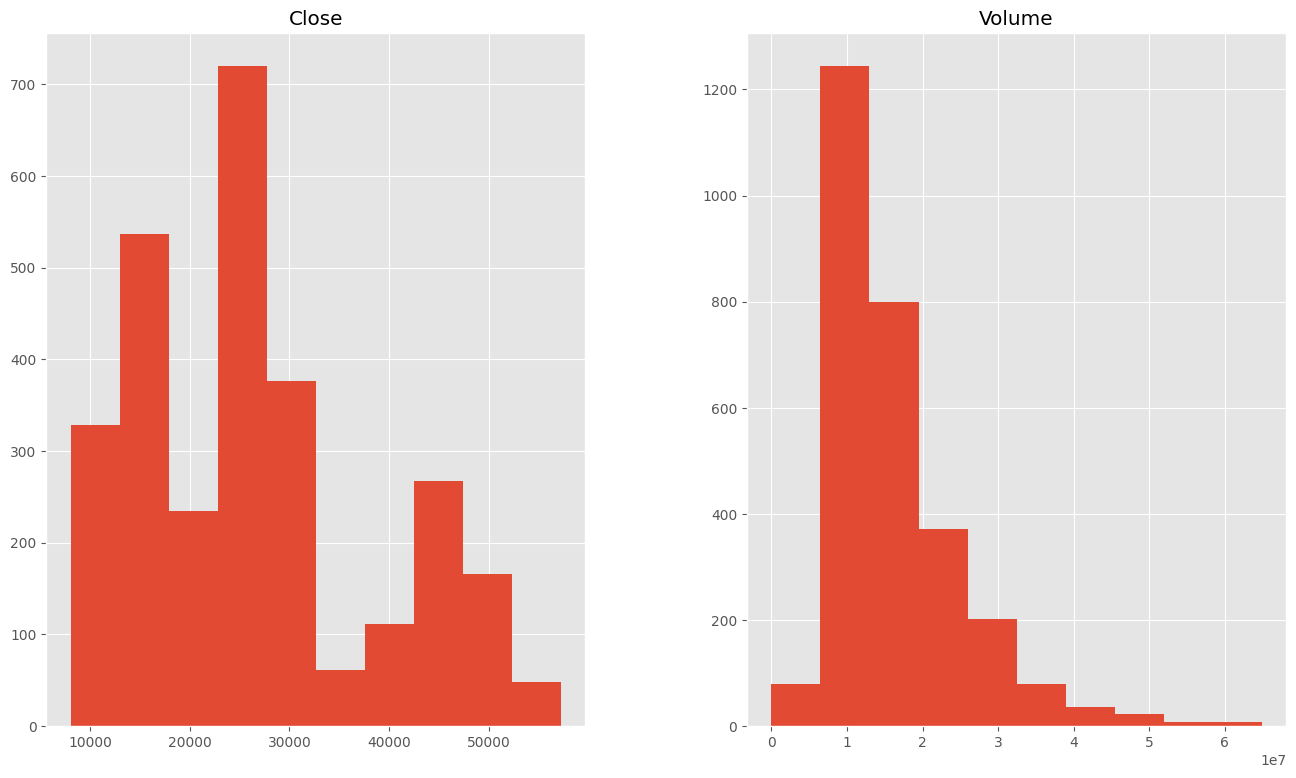

In [7]:
# ELIMINAMOS LA COLUMNA Date y Year, GENERAMOS UN HISTOGRAMA POR COLUMNA Y LOS MOSTRAMOS
datos.drop(['Date', 'Year'], axis=1).hist()
plt.show()

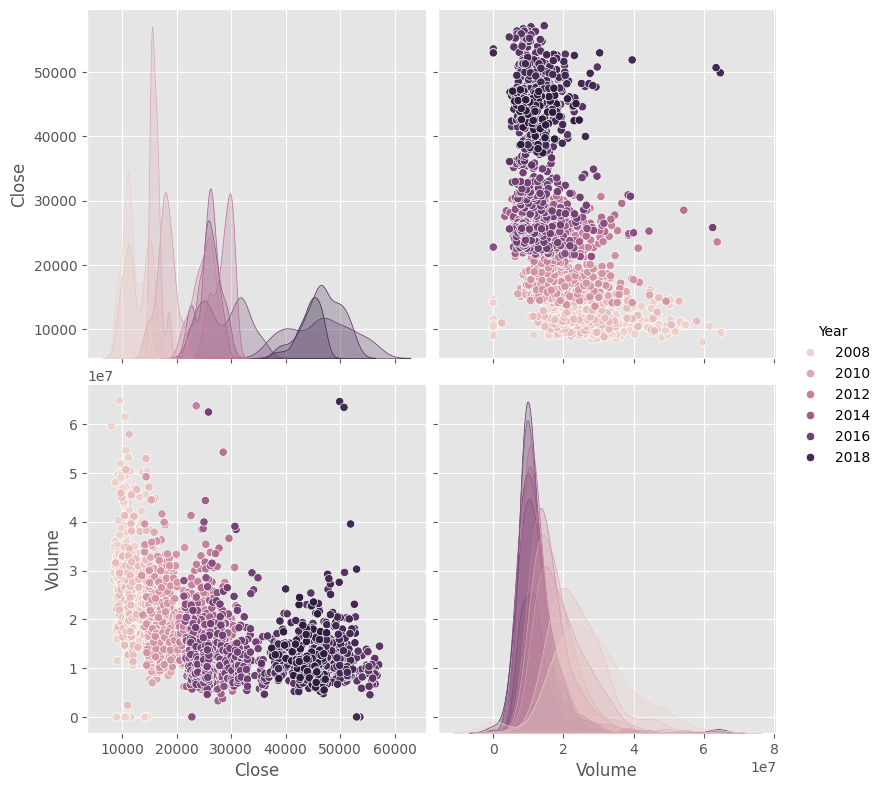

In [8]:
# MOSTRAMOS UNA VISUALIZACIÓN DE LOS DATOS AGRUPADOS
sb.pairplot(datos.dropna(), hue='Year',height=4, vars=["Close", "Volume"], kind='scatter')

In [9]:
# ASIGNAMOS LOS DATOS POR COLUMNA A NUESTRAS VARIABLES
X = np.array(datos[["Close","Volume"]])
y = np.array(datos['Year'])
X.shape

(2850, 2)

In [10]:
# MOSTRAMOS LONGITUD DE VALORES EN y
print("Valores únicos en y:", np.unique(y))

Valores únicos en y: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [11]:
# CONVERTIMOS LOS VALORES DE y (AÑOS) A ÍNDICES Y VOLVEMOS A MOSTRAR LA LONGITUD
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Valores únicos en y_encoded:", np.unique(y_encoded))

Valores únicos en y_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11]


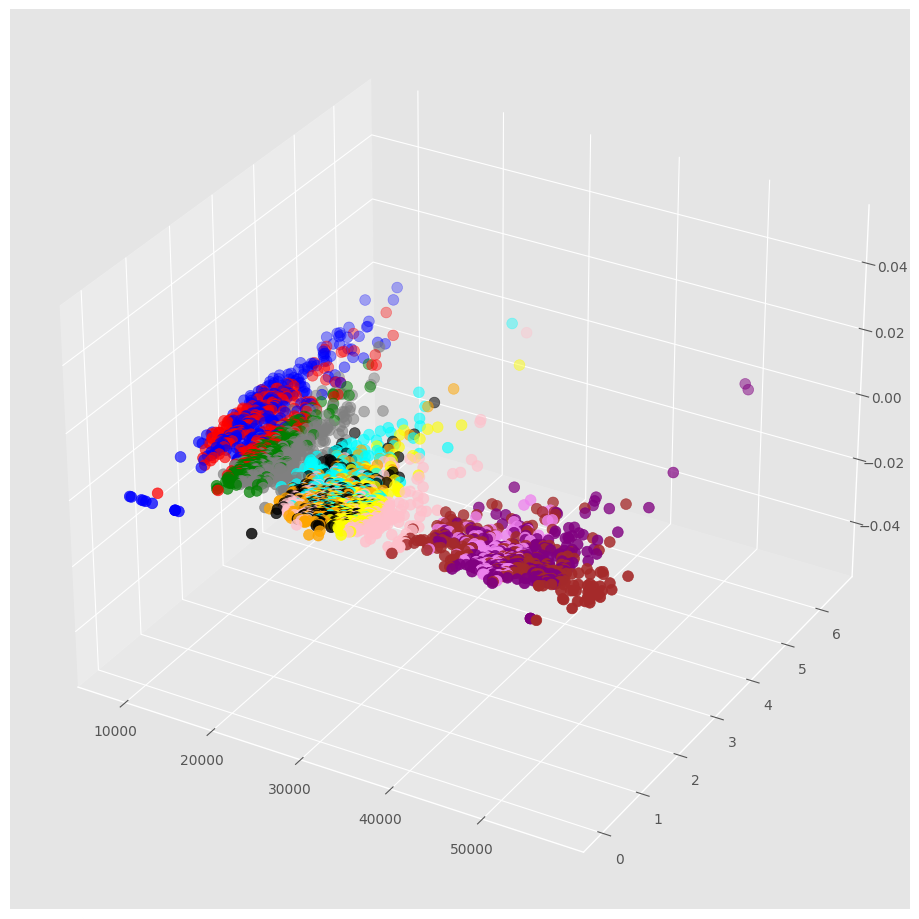

In [12]:
colores=['blue','red','green','gray','cyan','yellow','orange','black','pink','brown','purple','violet','lime','indigo']
asignar=[]
for row in y_encoded:
    asignar.append(colores[row])
    
#Grafica 3D para representar categorias
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)

c:\cursos\python\edc\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\cursos\python\edc\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\cursos\python\edc\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\cursos\python\edc\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

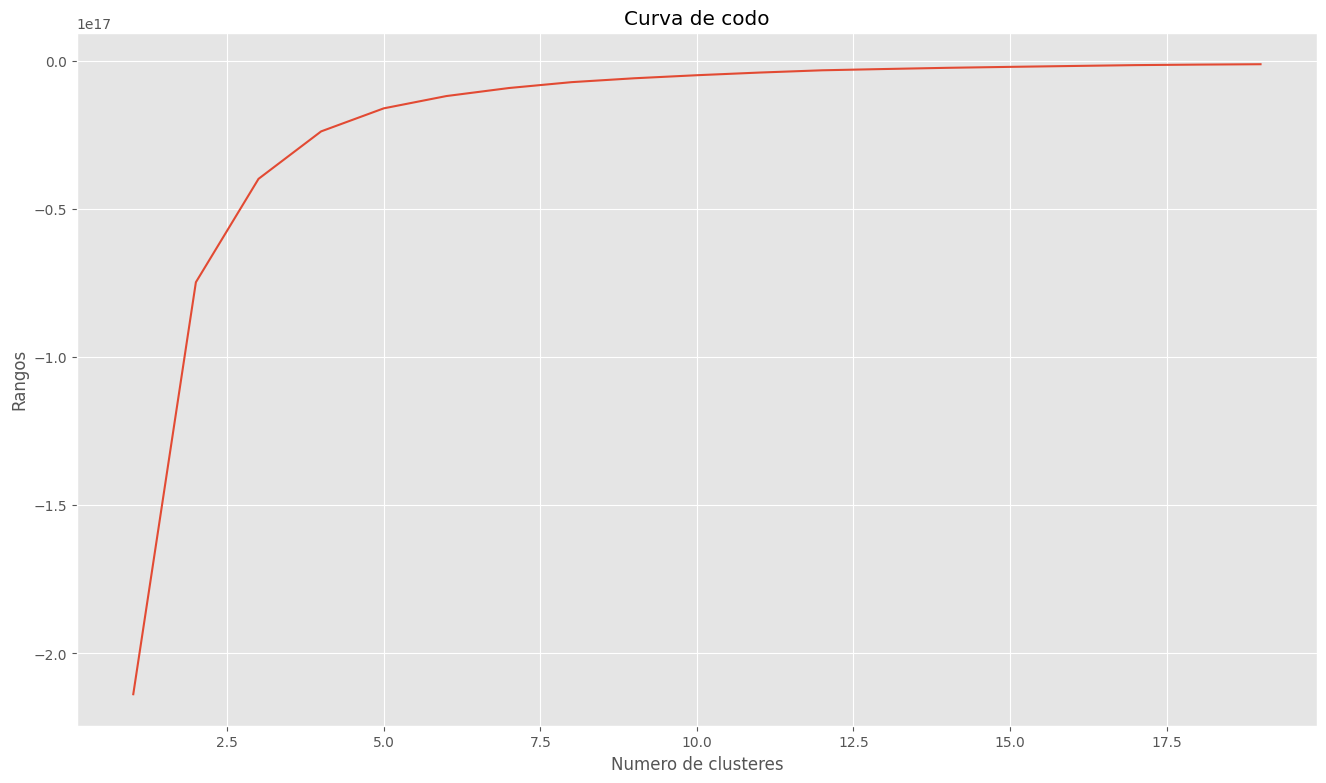

In [13]:
# SE OBTIENE EL VALOR ÓPTIMO DE K PARA EL ALGORITMO DE AGRUPAMIENTO
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de clusteres')
plt.ylabel('Rangos')
plt.title('Curva de codo')
plt.show()

In [14]:
# SE EJECUTA K-Means PARA OBTENER LOS CENTROIDES DE LOS DATOS
kmeans = KMeans(n_clusters=3).fit(X)
C = kmeans.cluster_centers_
print(C)

[[3.09460569e+04 1.09763327e+07]
 [2.04856181e+04 2.12006288e+07]
 [1.50799583e+04 3.70746246e+07]]


c:\cursos\python\edc\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# SE HACE PREDICCIÓN DE CLUSTERES Y SE ASIGNA A LA VARIABLE
labels = kmeans.predict(X)

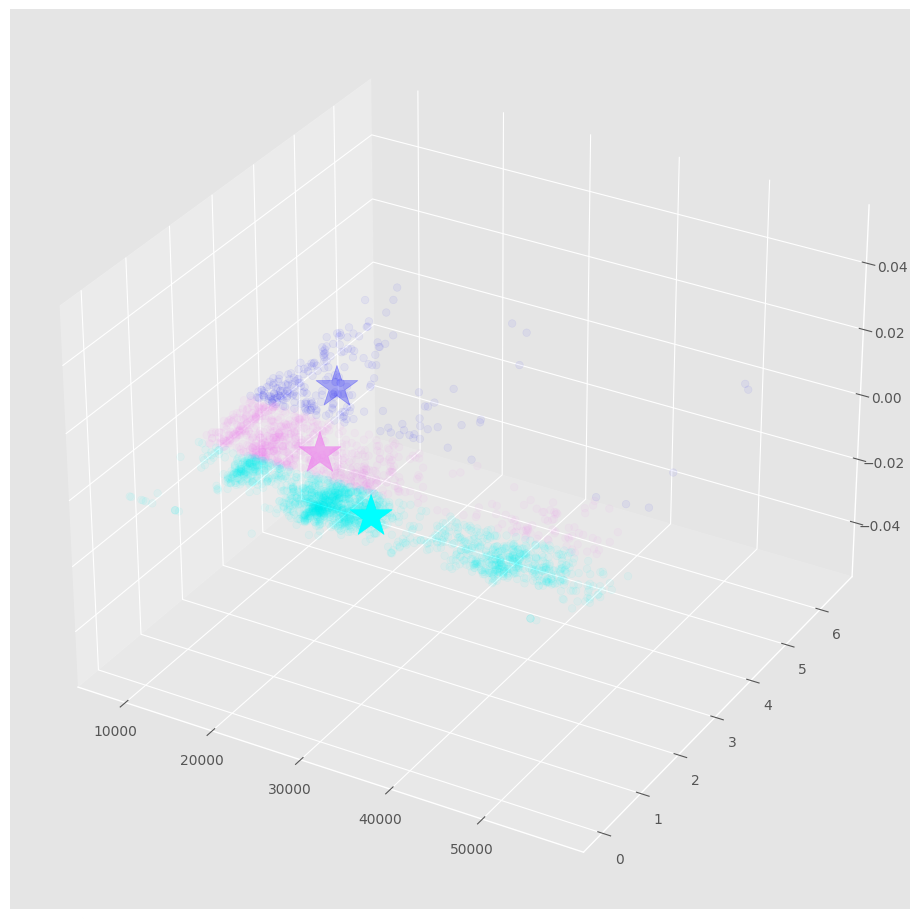

In [16]:
# MUESTRA LA GRÁFICA CON LOS CENTROIDES POR CLUSTER
colores=['cyan', 'violet', 'blue']
asignar = [colores[label] for label in labels]
 
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], c=asignar, s=30, alpha=0.05)  # PUNTOS MÁS PEQUEÑOS Y TRANSPARENTES
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

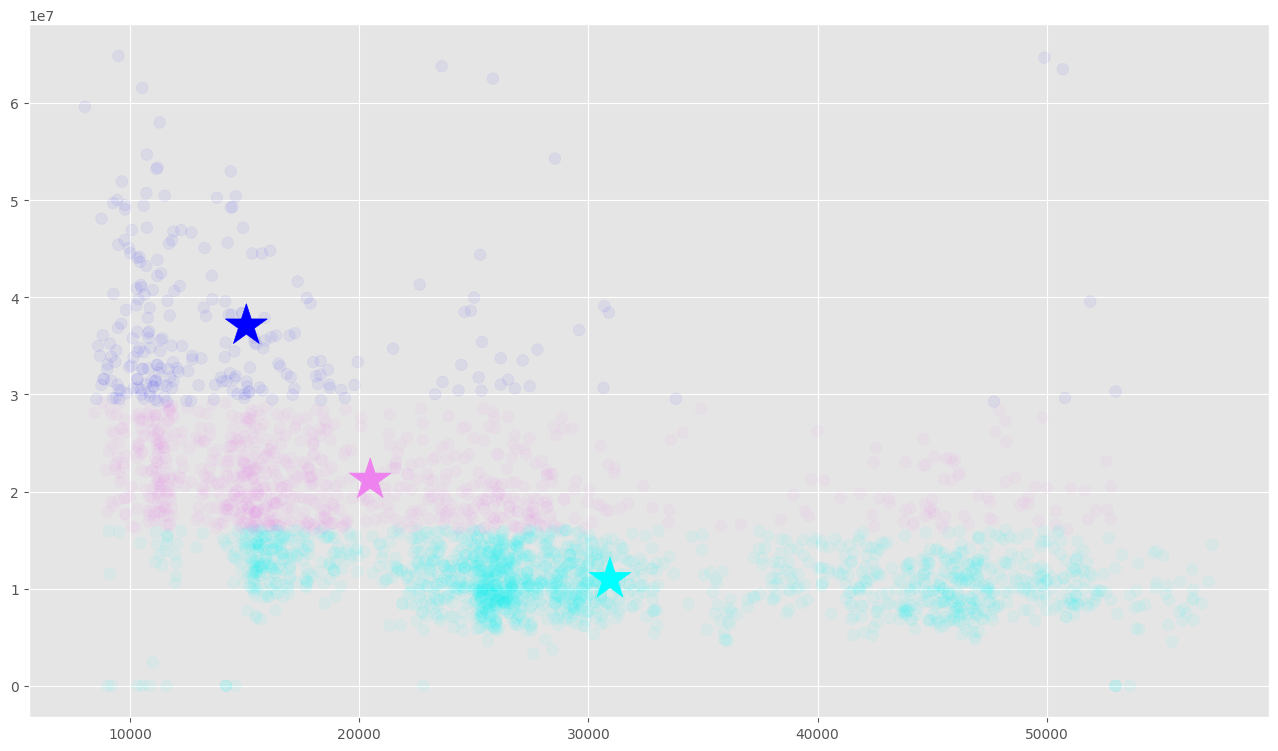

In [17]:
# COMPARAMOS Close CON Volume Y GRAFICAMOS
f1 = datos['Close'].values
f2 = datos['Volume'].values
 
plt.scatter(f1, f2, c=asignar, s=70,alpha=0.05)  # PUNTOS MÁS PEQUEÑOS Y TRANSPARENTES
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [18]:
# CANTIDAD POR CLUSTER
copy =  pd.DataFrame()
copy['VentasCierre']=datos['Close'].values
copy['Volumen']=datos['Volume'].values
copy['Año']=datos['Year'].values
copy['label'] = labels;

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,cyan,1793
1,violet,817
2,blue,240


In [19]:
# ACTIVIDAD DE VENTAS EN CADA AÑO PARA EL GRUPO 0 O Cyan
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo = group_referrals.groupby('Año').size().reset_index(name='Cantidad')
diversidadGrupo

,Año,Cantidad
0,2008,28
1,2009,33
2,2010,126
3,2011,94
4,2012,156
5,2013,204
6,2014,202
7,2015,213
8,2016,214
9,2017,217


In [20]:
# ACTIVIDAD DE VENTAS EN CADA AÑO PARA EL GRUPO 1 O Violet
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]

diversidadGrupo = group_referrals.groupby('Año').size().reset_index(name='Cantidad')
diversidadGrupo

,Año,Cantidad
0,2008,124
1,2009,161
2,2010,111
3,2011,125
4,2012,81
5,2013,36
6,2014,40
7,2015,34
8,2016,28
9,2017,23


In [21]:
# ACTIVIDAD DE VENTAS EN CADA AÑO PARA EL GRUPO 2 O Blue
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]

diversidadGrupo = group_referrals.groupby('Año').size().reset_index(name='Cantidad')
diversidadGrupo

,Año,Cantidad
0,2008,105
1,2009,59
2,2010,14
3,2011,29
4,2012,11
5,2013,7
6,2014,3
7,2015,2
8,2016,4
9,2017,1


In [22]:
# MOSTRAMOS LAS VENTAS DEL AÑO 2008 DEL ULTIMO GRUPO
for index, row in group_referrals.iterrows():
    if row["Año"] == 2008:
        print (row["Año"], row["Volumen"], row["VentasCierre"],row["label"])

2008 39787200 10380 2
2008 31551350 10320 2
2008 40283950 10640 2
2008 49448100 10600 2
2008 42213900 11200 2
2008 35586400 11340 2
2008 43213650 10720 2
2008 36303850 10800 2
2008 35769400 11420 2
2008 46767100 11900 2
2008 46921550 12240 2
2008 31354900 11100 2
2008 30835150 11000 2
2008 40741250 11000 2
2008 42480400 11360 2
2008 35035300 11820 2
2008 32334250 12120 2
2008 29338650 12460 2
2008 33978600 12720 2
2008 38936050 13220 2
2008 33709550 13120 2
2008 39799750 13600 2
2008 50257700 13800 2
2008 38231450 14320 2
2008 31382450 14220 2
2008 50417500 14620 2
2008 38358100 14900 2
2008 34440750 14560 2
2008 30044650 14700 2
2008 30207500 15200 2
2008 31627250 14560 2
2008 45623100 14260 2
2008 42225400 13580 2
2008 30999100 13720 2
2008 45085450 13260 2
2008 33602250 12720 2
2008 29315200 12660 2
2008 29763900 11500 2
2008 53374150 11200 2
2008 32717400 11360 2
2008 32596450 11680 2
2008 34992900 12280 2
2008 50458700 11520 2
2008 43858300 11200 2
2008 29814350 10880 2
2008 31373

In [23]:
# MOSTRAMOS LAS VENTAS DEL AÑO 2019 DEL ULTIMO GRUPO
for index, row in group_referrals.iterrows():
    if row["Año"] == 2019:
        print (row["Año"], row["Volumen"], row["VentasCierre"],row["label"])

In [24]:
# MOSTRAMOS EL TOTAL DE NUESTROS CLUSTERES
len(C)

3

In [25]:
# MOSTRAMOS EL TOTAL DE NUESTROS REGISTROS
len(X)

2850

In [26]:
# MOSTRAMOS CRACTERÍSTICAS PROMEDIO DE CADA CLUSTER
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["Close", "Volume"])
print(cluster_centroids)

          Close        Volume
0  30946.056888  1.097633e+07
1  20485.618115  2.120063e+07
2  15079.958333  3.707462e+07


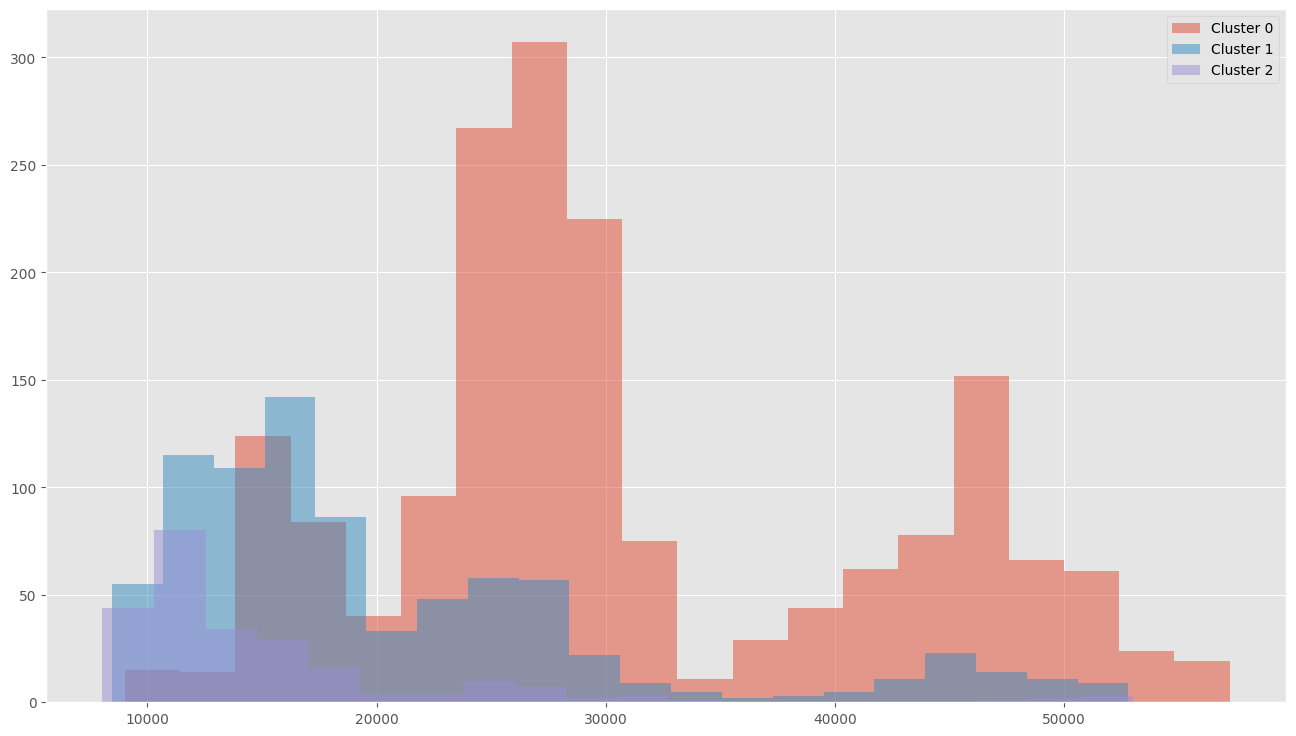

In [27]:
# MOSTRAMOS HISTOGRAMA POR CADA CLUSTER
for i in range(kmeans.n_clusters):
    cluster_data = copy[copy['label'] == i]
    plt.hist(cluster_data['VentasCierre'], bins=20, alpha=0.5, label=f'Cluster {i}')
plt.legend()
plt.show()